<a href="https://colab.research.google.com/github/i-SanMartin/IAnotebooks/blob/main/BasicTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

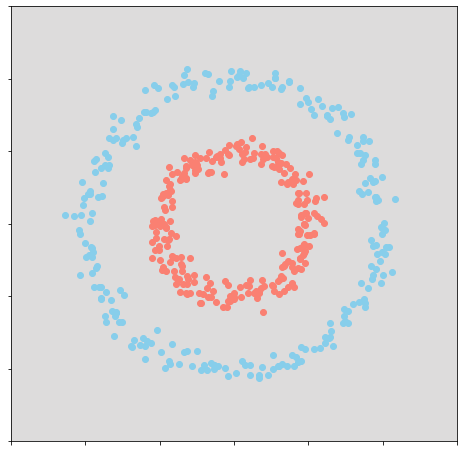

In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100 

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

Step 0 / 3000 - Loss =  0.4945988 - Acc = 0.5
Step 25 / 3000 - Loss =  0.49407506 - Acc = 0.5
Step 50 / 3000 - Loss =  0.4935193 - Acc = 0.5
Step 75 / 3000 - Loss =  0.49290118 - Acc = 0.5
Step 100 / 3000 - Loss =  0.4922026 - Acc = 0.5
Step 125 / 3000 - Loss =  0.49139485 - Acc = 0.5
Step 150 / 3000 - Loss =  0.49044815 - Acc = 0.5
Step 175 / 3000 - Loss =  0.48934504 - Acc = 0.5
Step 200 / 3000 - Loss =  0.4880297 - Acc = 0.5
Step 225 / 3000 - Loss =  0.48645246 - Acc = 0.5
Step 250 / 3000 - Loss =  0.48452076 - Acc = 0.5
Step 275 / 3000 - Loss =  0.48210576 - Acc = 0.5
Step 300 / 3000 - Loss =  0.47905153 - Acc = 0.5
Step 325 / 3000 - Loss =  0.47512585 - Acc = 0.5
Step 350 / 3000 - Loss =  0.47044745 - Acc = 0.5
Step 375 / 3000 - Loss =  0.46466962 - Acc = 0.5
Step 400 / 3000 - Loss =  0.45827964 - Acc = 0.5
Step 425 / 3000 - Loss =  0.4518196 - Acc = 0.5
Step 450 / 3000 - Loss =  0.44492915 - Acc = 0.498
Step 475 / 3000 - Loss =  0.43756494 - Acc = 0.48
Step 500 / 3000 - Loss =  0

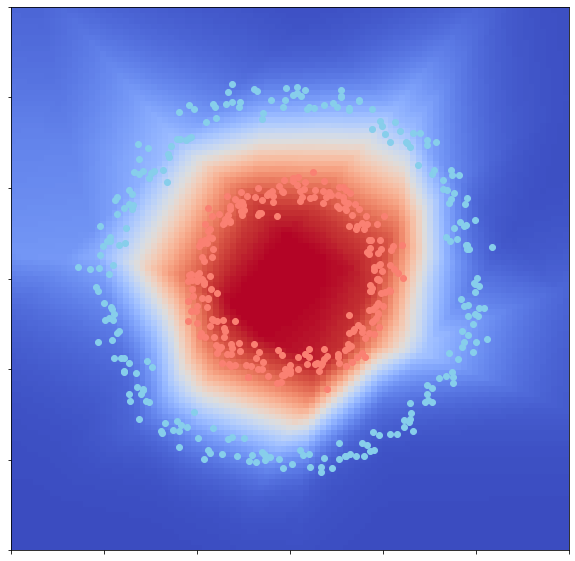

In [5]:
from matplotlib import animation
from IPython.core.display import display, HTML

import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

#Creamos los puntos de entrada de nuestro grafo
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

nn = [2, 16, 8, 1]  #numero de neuronas por capa
lr = 0.01           #ratio de aprendizaje

#Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

#Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

#Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

#Salida de la red
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:,0]

#Evaluacion de predicciones
loss = tf.losses.mean_squared_error(pY, iY)

#Creamos el optimizador que entrenará a la red
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

n_steps = 3000 #Numero de pasos para entrenar a la red

iPY = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for step in range(n_steps):
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })

  # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)
      
  
# ----- CÓDIGO ANIMACIÓN ----- #

ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):
  
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())